In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score,mean_squared_error

#Data upload

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from zipfile import ZipFile

In [4]:
with ZipFile("/content/drive/MyDrive/Colab Notebooks/student+performance.zip","r") as zipObj:
  zipObj.extractall("/content/drive/MyDrive/test")

In [5]:
with ZipFile("/content/drive/MyDrive/test/student.zip","r") as zipObj:
  zipObj.extractall("/content/drive/MyDrive/test2")


#DATASET

In [6]:
path = "/content/drive/MyDrive/test2/student-por.csv"
d2 = pd.read_csv(path,sep=';')

In [7]:
d2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


#Data Preprocessing

In [8]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [9]:
d2.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
for i in range(d2.shape[1]):
  print(d2.iloc[:,i].unique())
  print(d2.iloc[:,i].value_counts())

['GP' 'MS']
GP    423
MS    226
Name: school, dtype: int64
['F' 'M']
F    383
M    266
Name: sex, dtype: int64
[18 17 15 16 19 22 20 21]
17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64
['U' 'R']
U    452
R    197
Name: address, dtype: int64
['GT3' 'LE3']
GT3    457
LE3    192
Name: famsize, dtype: int64
['A' 'T']
T    569
A     80
Name: Pstatus, dtype: int64
[4 1 3 2 0]
2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64
[4 1 2 3 0]
2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64
['at_home' 'health' 'other' 'services' 'teacher']
other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64
['teacher' 'other' 'services' 'health' 'at_home']
other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64
['course' 'other' 'home' 'reputation']
course        285
home          149
reputation    143
other          7

In [11]:
d2.shape

(649, 33)

In [12]:
d2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [13]:
d2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [14]:
column_names = list(d2.columns)
print(column_names)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [15]:
d2.shape

(649, 33)

In [16]:
# list of columns with null values
missing_values_columns = [col for col in d2.columns if d2.isnull().sum()[col] > 0]
missing_values_columns

[]

#mi scores


In [17]:
X = d2.copy()
y = X.pop("G3")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [18]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

G2            1.226903
G1            0.777411
failures      0.104593
higher        0.090114
Medu          0.078908
school        0.071384
absences      0.051880
reason        0.047997
goout         0.042965
Fjob          0.038212
traveltime    0.037576
health        0.034368
sex           0.033928
Dalc          0.029066
studytime     0.028117
age           0.026754
Fedu          0.026537
Mjob          0.022515
Walc          0.018424
internet      0.014373
schoolsup     0.009610
guardian      0.008096
freetime      0.000000
Pstatus       0.000000
nursery       0.000000
famrel        0.000000
romantic      0.000000
address       0.000000
activities    0.000000
paid          0.000000
famsize       0.000000
famsup        0.000000
Name: MI Scores, dtype: float64

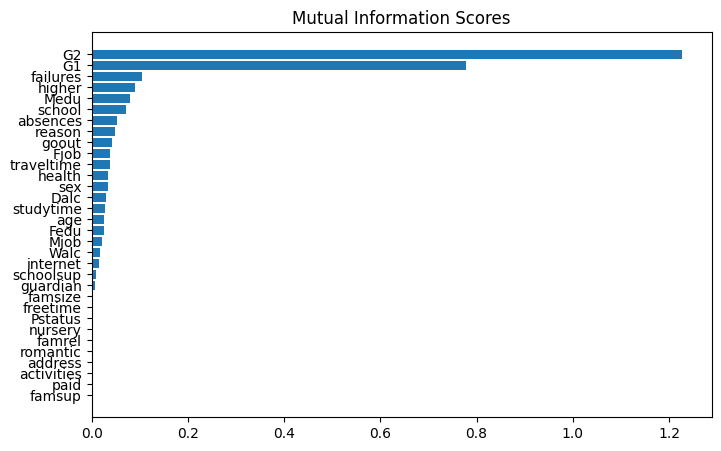

In [19]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [20]:
d2.drop(['address','famsize','famsup','activities','paid','traveltime','schoolsup','health', 'Pstatus','Fjob', 'guardian','romantic', 'famrel', 'freetime','nursery'],axis = 1, inplace = True)

#Data Visualization

In [21]:
d2.head()

,school,sex,age,Medu,Fedu,Mjob,reason,studytime,failures,higher,internet,goout,Dalc,Walc,absences,G1,G2,G3
0,GP,F,18,4,4,at_home,course,2,0,yes,no,4,1,1,4,0,11,11
1,GP,F,17,1,1,at_home,course,2,0,yes,yes,3,1,1,2,9,11,11
2,GP,F,15,1,1,at_home,other,2,0,yes,yes,2,2,3,6,12,13,12
3,GP,F,15,4,2,health,home,3,0,yes,yes,2,1,1,0,14,14,14
4,GP,F,16,3,3,other,home,2,0,yes,no,2,1,2,0,11,13,13


<Axes: xlabel='reason', ylabel='G3'>

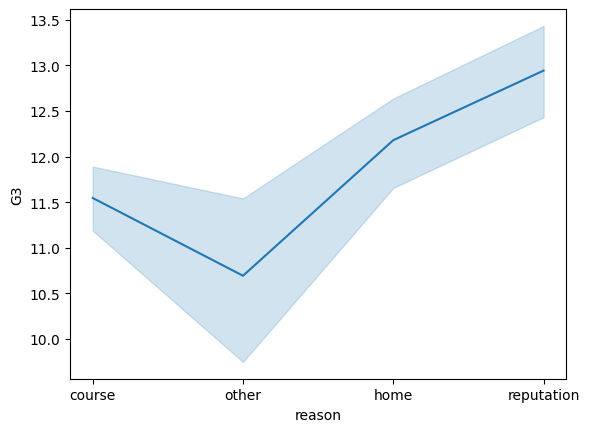

In [22]:
sns.lineplot(x=d2["reason"],y=d2["G3"])

<Axes: xlabel='G3', ylabel='count'>

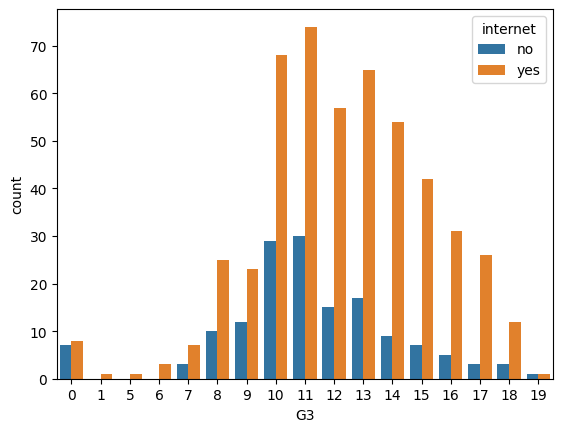

In [23]:
sns.countplot(d2, hue="internet", x="G3")

<Axes: xlabel='G3', ylabel='count'>

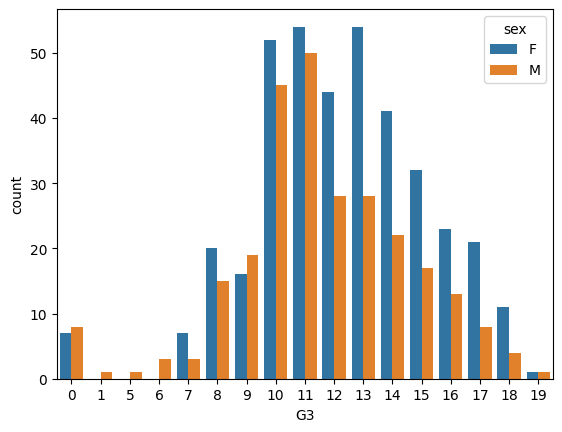

In [24]:
sns.countplot(d2, hue="sex", x="G3")

<Axes: xlabel='internet', ylabel='G3'>

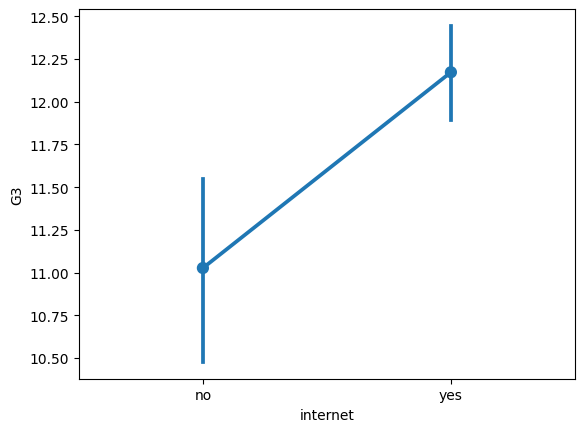

In [25]:
sns.pointplot(x=d2["internet"],y=d2["G3"])

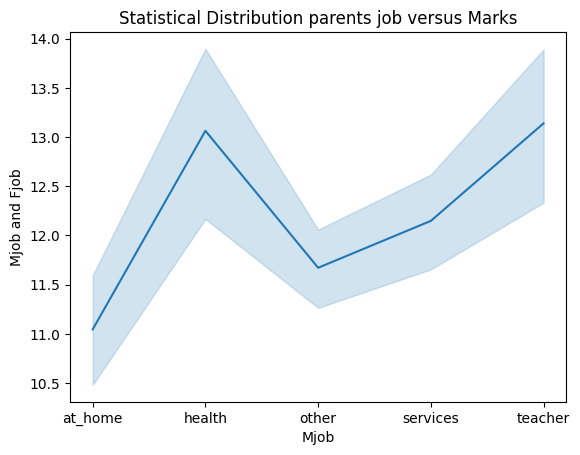

In [26]:
sns.lineplot(x=d2["Mjob"],y=d2["G3"])

plt.title('Statistical Distribution parents job versus Marks')
plt.ylabel('Mjob and Fjob')
plt.show()

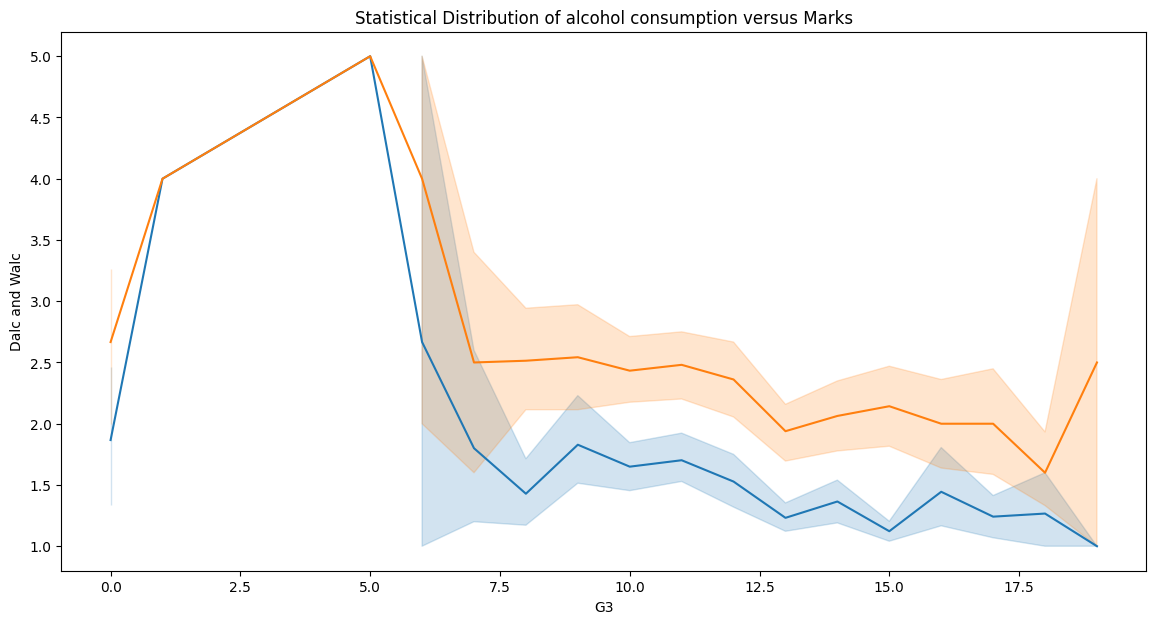

In [27]:
plt.figure(figsize=(14,7))
sns.lineplot(y=d2["Dalc"],x=d2["G3"])
sns.lineplot(y=d2["Walc"],x=d2["G3"])
plt.title('Statistical Distribution of alcohol consumption versus Marks')
plt.ylabel('Dalc and Walc')
plt.show()

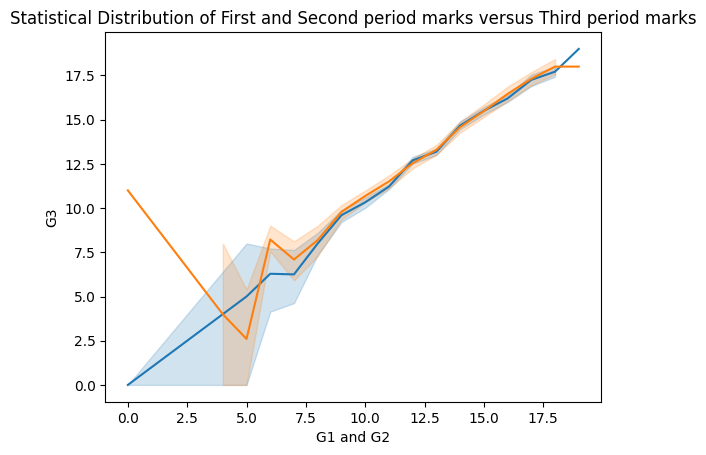

In [28]:
sns.lineplot(x=d2["G2"],y=d2["G3"])
sns.lineplot(x=d2["G1"],y=d2["G3"])
plt.title('Statistical Distribution of First and Second period marks versus Third period marks')
plt.xlabel('G1 and G2')
plt.show()

Text(0.5, 1.0, 'Statistical Distribution of First period marks versus Third period marks')

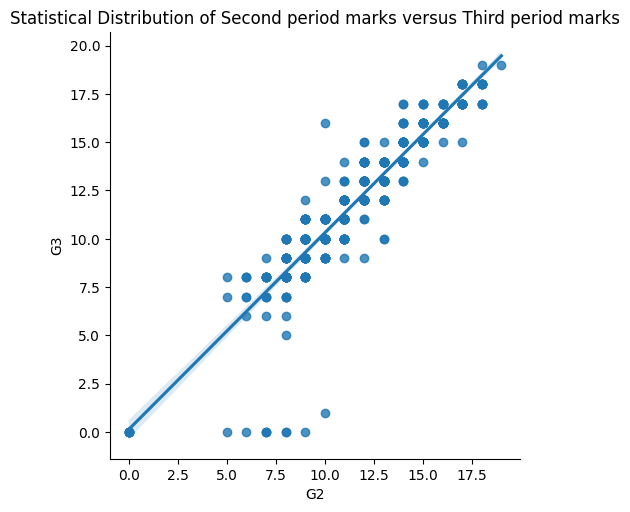

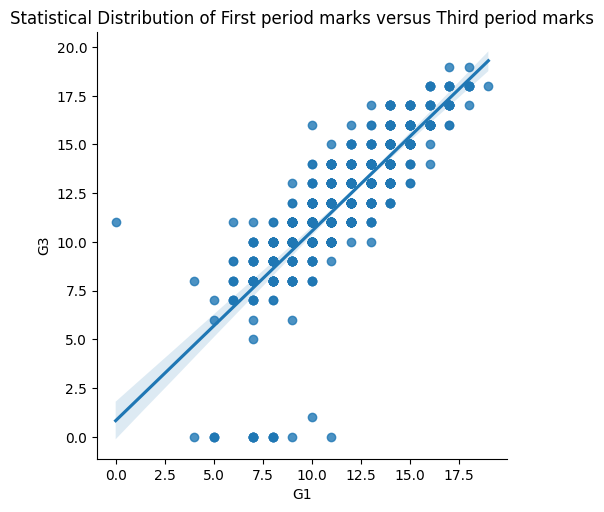

In [29]:
sns.lmplot(data=d2, x="G2", y="G3")
plt.title('Statistical Distribution of Second period marks versus Third period marks')
sns.lmplot(data=d2, x="G1", y="G3")
plt.title('Statistical Distribution of First period marks versus Third period marks')

In [30]:
from sklearn.preprocessing import LabelEncoder
d4 = d2.apply(LabelEncoder().fit_transform)

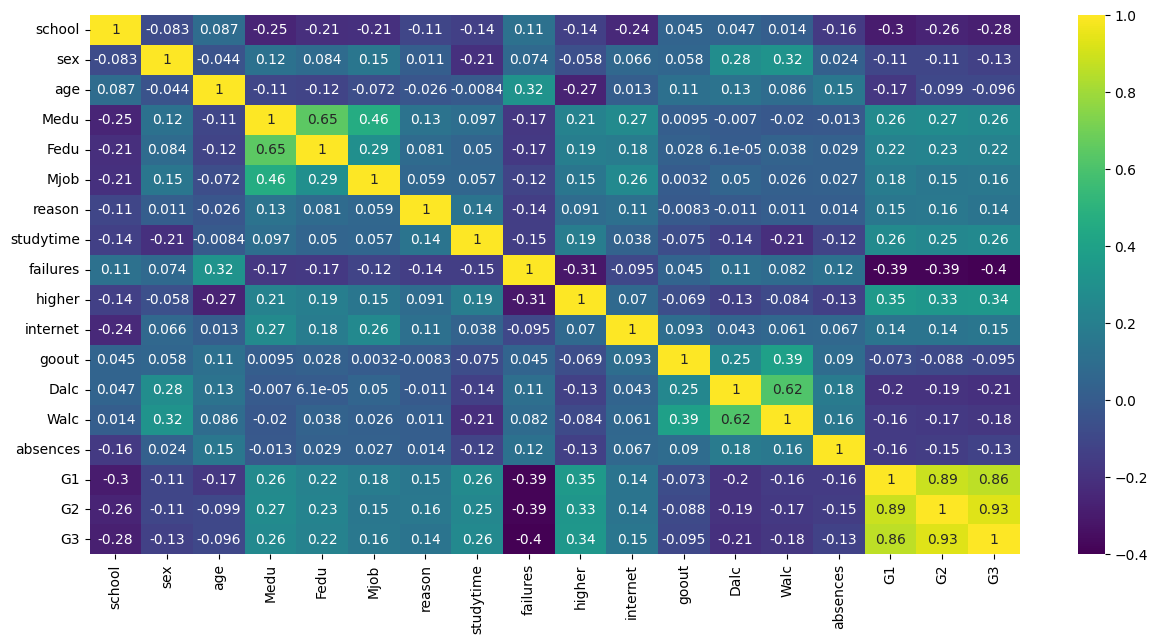

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(d4.corr(),annot=True,cmap='viridis')
plt.show()

<Axes: xlabel='G3'>

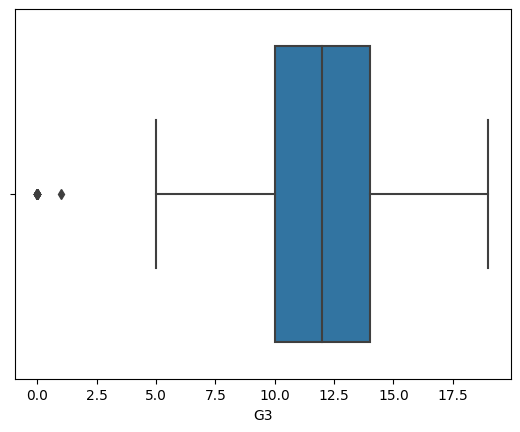

In [32]:
sns.boxplot(x=d2.G3)


<ipython-input-33-061129263d56>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")


Text(0.5, 1.0, 'Bar Plot of school with G3')

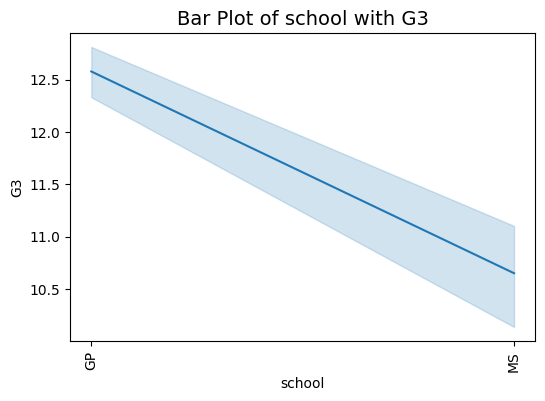

In [33]:
figure(figsize=(6,4))
plot = sns.lineplot(x=d2["school"],y=d2["G3"])
plot.set_xticklabels(plot.get_xticklabels(),rotation="vertical")
plot.set_title("Bar Plot of school with G3", fontsize=14)

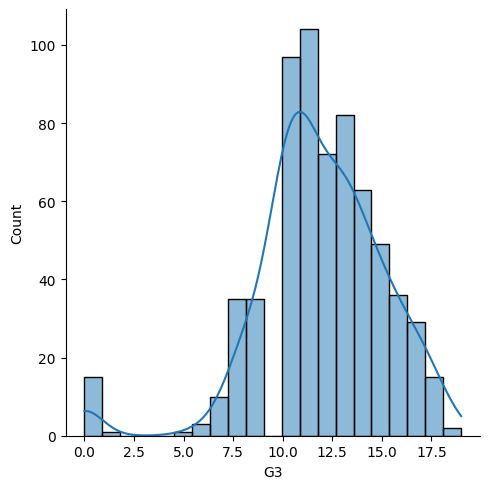

In [34]:
plot = sns.displot(data=d2["G3"], kde=True)

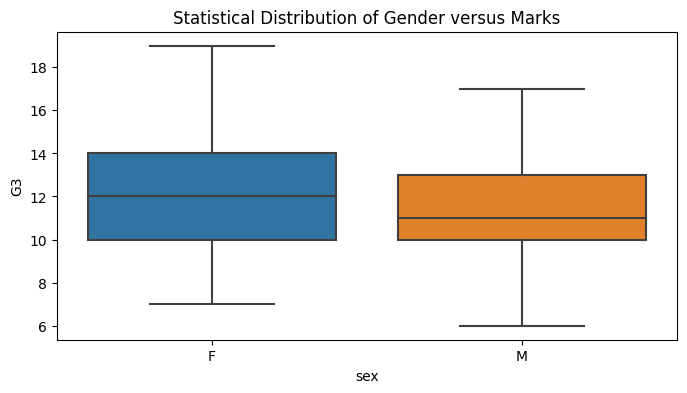

In [35]:
plt.figure(figsize=(8,4))
sns.boxplot( x=d2['sex'], y=d2['G3'],showfliers=False )

plt.title('Statistical Distribution of Gender versus Marks')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 42.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 51.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


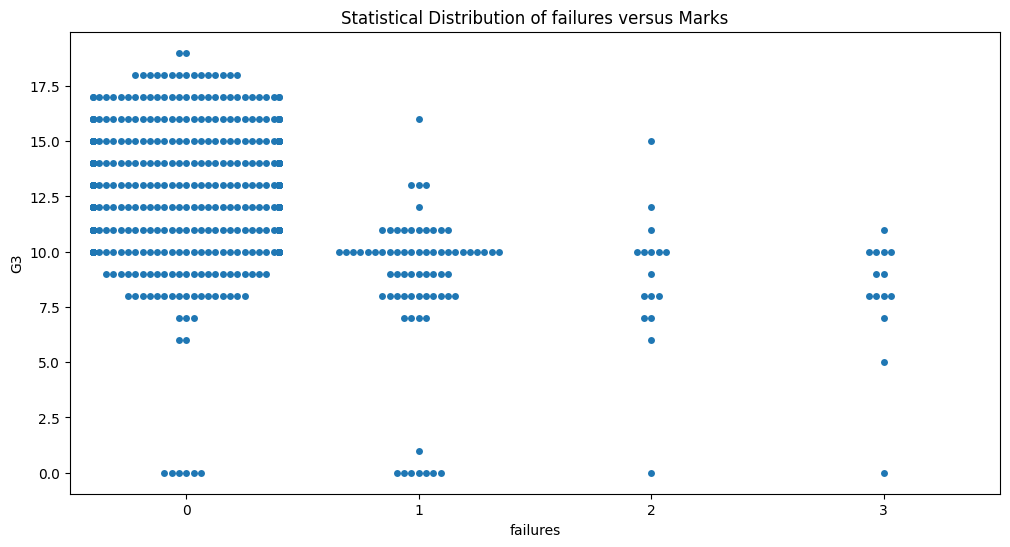

In [36]:
plt.figure(figsize = (12, 6))
sns.swarmplot(x ='failures', y = 'G3',data=d2)
plt.title('Statistical Distribution of failures versus Marks')

plt.show()

Text(0.5, 1.0, 'Statistical Distribution of pursueing higher education versus Marks')

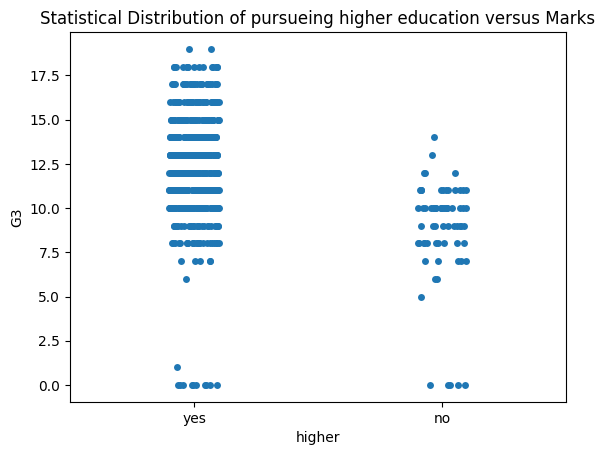

In [37]:
sns.stripplot(x=d2['higher'],y=d2["G3"])
plt.title('Statistical Distribution of pursueing higher education versus Marks')

<Axes: xlabel='age', ylabel='G3'>

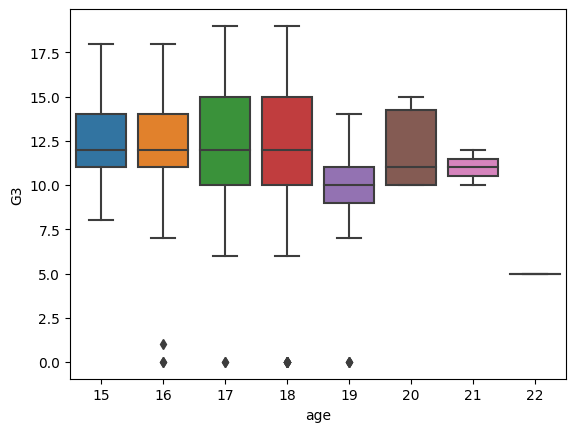

In [38]:
sns.boxplot(y=d2["G3"], x=d2["age"])

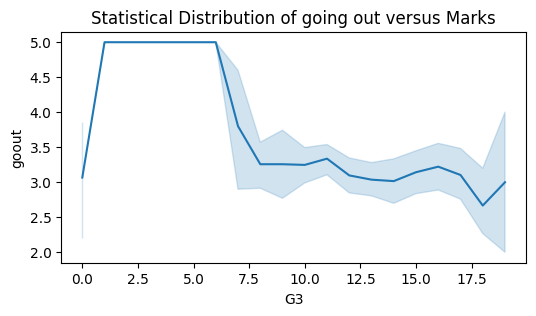

In [39]:
plt.figure(figsize = (6, 3))
sns.lineplot(y ='goout', x = 'G3',data=d2)
plt.title('Statistical Distribution of going out versus Marks')
plt.show()

Text(0.5, 1.0, 'Statistical Distribution of studytime versus Marks')

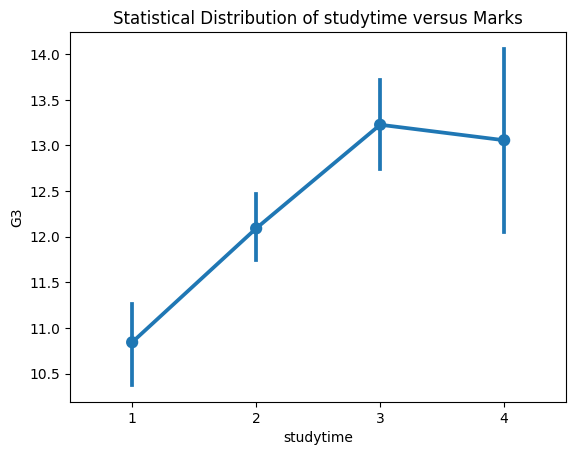

In [40]:
sns.pointplot(data= d2, x="studytime", y="G3")
plt.title('Statistical Distribution of studytime versus Marks')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.1% of the points cannot be place

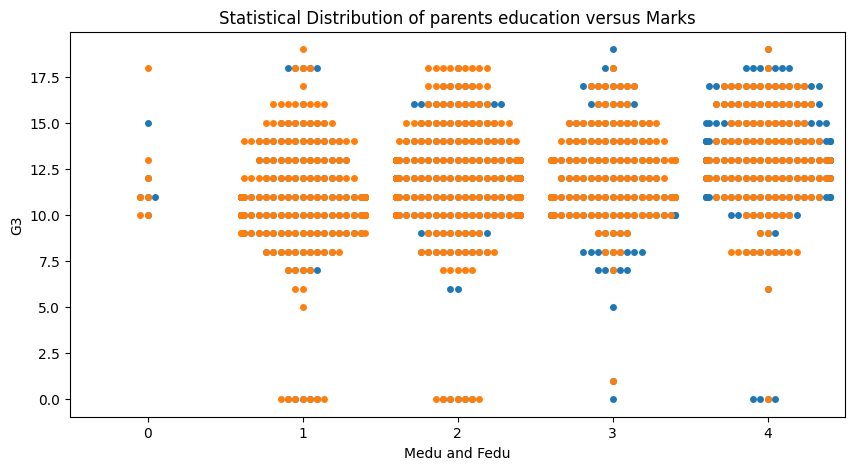

In [110]:
plt.figure(figsize = (10, 5))
sns.swarmplot(x='Medu', y = 'G3',data=d2)
sns.swarmplot(x ='Fedu', y = 'G3',data=d2)
plt.title('Statistical Distribution of parents education versus Marks')
plt.xlabel('Medu and Fedu')
plt.show()

<Axes: xlabel='G3', ylabel='absences'>

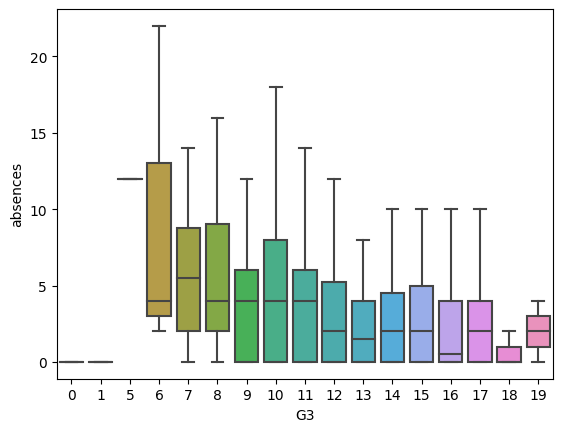

In [42]:
sns.boxplot(y='absences', x = 'G3',data=d2, showfliers = False)

#Dummy varible encoding

In [43]:
d2.head()

,school,sex,age,Medu,Fedu,Mjob,reason,studytime,failures,higher,internet,goout,Dalc,Walc,absences,G1,G2,G3
0,GP,F,18,4,4,at_home,course,2,0,yes,no,4,1,1,4,0,11,11
1,GP,F,17,1,1,at_home,course,2,0,yes,yes,3,1,1,2,9,11,11
2,GP,F,15,1,1,at_home,other,2,0,yes,yes,2,2,3,6,12,13,12
3,GP,F,15,4,2,health,home,3,0,yes,yes,2,1,1,0,14,14,14
4,GP,F,16,3,3,other,home,2,0,yes,no,2,1,2,0,11,13,13


In [44]:
x= pd.get_dummies(d2, drop_first=True)
print(x)

     age  Medu  Fedu  studytime  failures  goout  Dalc  Walc  absences  G1  \
0     18     4     4          2         0      4     1     1         4   0   
1     17     1     1          2         0      3     1     1         2   9   
2     15     1     1          2         0      2     2     3         6  12   
3     15     4     2          3         0      2     1     1         0  14   
4     16     3     3          2         0      2     1     2         0  11   
..   ...   ...   ...        ...       ...    ...   ...   ...       ...  ..   
644   19     2     3          3         1      2     1     2         4  10   
645   18     3     1          2         0      4     1     1         4  15   
646   18     1     1          2         0      1     1     1         6  11   
647   17     3     1          1         0      5     3     4         6  10   
648   18     3     2          1         0      1     3     4         4  10   

     ...  sex_M  Mjob_health  Mjob_other  Mjob_services  Mjob_t

In [45]:
X=x.drop(['G3'],axis=1)

print(X)
y = x['G3']
print(y)

     age  Medu  Fedu  studytime  failures  goout  Dalc  Walc  absences  G1  \
0     18     4     4          2         0      4     1     1         4   0   
1     17     1     1          2         0      3     1     1         2   9   
2     15     1     1          2         0      2     2     3         6  12   
3     15     4     2          3         0      2     1     1         0  14   
4     16     3     3          2         0      2     1     2         0  11   
..   ...   ...   ...        ...       ...    ...   ...   ...       ...  ..   
644   19     2     3          3         1      2     1     2         4  10   
645   18     3     1          2         0      4     1     1         4  15   
646   18     1     1          2         0      1     1     1         6  11   
647   17     3     1          1         0      5     3     4         6  10   
648   18     3     2          1         0      1     3     4         4  10   

     ...  sex_M  Mjob_health  Mjob_other  Mjob_services  Mjob_t

#Linear Regression

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

In [47]:

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [48]:
y_preds = lm.predict(X_test)


In [49]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_preds))

Mean squared error: 1.67
Coefficient of determination: 0.86


In [50]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_preds))

0.818767558894644


#Decision Tree Regressor

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
grade_model = DecisionTreeRegressor(criterion= 'absolute_error',
 max_depth= 7,
 max_leaf_nodes= 13,
 min_samples_split= 2)

# Fit model
grade_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_leaf_nodes=13)

In [53]:
pred = grade_model.predict(X_test)
print(pred)

[10.  15.  13.  11.  15.  18.  18.  11.  10.  10.  15.  11.  13.  15.
 11.  15.  13.  11.  10.   6.5 15.  13.  11.  10.  18.   8.  13.  15.
 11.  10.  13.  13.  15.  15.  15.  11.  17.   9.5 10.  10.  16.  13.
 11.  13.   8.  13.  18.  13.  16.  13.  13.   8.  11.  10.  13.   6.5
 10.  13.  18.  13.   0.  10.  10.  13.  18.   8.  13.  10.   0.  10.
 10.   8.  11.   8.  13.  13.  11.  10.  17.  11.  15.  13.  11.  10.
 15.  11.  13.  10.  13.  18.  11.  10.  10.  13.  13.  17.  10.   8.
 11.  10.  11.  10.  10.  16.  10.  10.  13.  11.  15.  15.  10.  10.
 11.  17.  15.  13.   9.5 15.  10.  13.   9.5 10.  10.   0.  16.  15.
 13.  13.   0.  15. ]


In [54]:
print(mean_absolute_error(y_test, pred))

0.7653846153846153


#Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
grade_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, grade_preds))

0.8215384615384617


#SVM

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.173 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.173 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.173 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.173 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.175 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.173 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.173 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.173 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.173 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.175 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.173 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.212 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.183 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.212 total time=   0.0s
[CV 5/5] END .....C=0.1, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [57]:

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


In [58]:
from sklearn.svm import SVC
#Build the model
svm1 = SVC(kernel="rbf", gamma=0.01, C=10)
# Trained the model
svm1.fit(X_train, y_train.values.ravel())


SVC(C=10, gamma=0.01)

In [59]:
y_preds= svm1.predict(X_test)
print(mean_absolute_error(y_test, y_preds))

0.8307692307692308


#RIDGE REGRESSION

In [60]:
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


In [61]:
# define model
model = Ridge(alpha=0.99)
# fit model
model.fit(X_train, y_train.values.ravel())

# make a prediction
yhat = model.predict(X_test)
print(mean_absolute_error(y_test, yhat))

0.8181295009158766


#ADA BOOSTING

In [62]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np

import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [63]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,10):
     tree_regressor=tree.DecisionTreeRegressor(max_depth=depth,random_state=1)
     if tree_regressor.fit(X,y).tree_.max_depth<depth:
         break
     score=np.mean(cross_val_score(tree_regressor,X,y,scoring='neg_mean_squared_error', cv=crossvalidation,n_jobs=1))
     print(depth, score)

1 -4.981026333708486
2 -2.881065889356796
3 -2.0948436478236565
4 -2.0239973751114007
5 -2.1371902779902685
6 -2.7359568781792754
7 -2.957193309387404
8 -2.7170807101593
9 -3.1789907688262735


In [64]:
ada=AdaBoostRegressor()
# search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
# search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)

In [65]:
# search.fit(X_train,y_train.values.ravel())
# search.best_params_

In [66]:
ada2=AdaBoostRegressor(n_estimators=500,learning_rate=0.001,random_state=1)
score=np.mean(cross_val_score(ada2,X,y,scoring='neg_mean_squared_error',cv=crossvalidation,n_jobs=1))
score

-1.8631150458472798

In [67]:
ada2.fit(X_train, y_train.values.ravel())
predictt = ada2.predict(X_test)
mean_absolute_error(y_test,predictt)

0.9014769545982366

#XGBOOST

In [68]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [69]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train.values.ravel())

# Predict the model
pred = xgb_r.predict(X_test)

mean_absolute_error(y_test,pred)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:09:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.7869836697211632

#New Model Without G2 and G1

In [70]:
path = "/content/drive/MyDrive/test2/student-por.csv"
d3 = pd.read_csv(path,sep=';')

In [71]:
d3.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [72]:
d3['G3'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [73]:
d3.drop(['G2','G1'],axis = 1,inplace=True)

#mi scores


In [74]:
X = d3.copy()
y = X.pop("G3")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [75]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

failures      0.115574
age           0.111517
school        0.075168
higher        0.069572
goout         0.066365
Mjob          0.056052
Medu          0.043137
traveltime    0.039802
romantic      0.039382
absences      0.037308
studytime     0.036428
Dalc          0.029288
Fedu          0.027503
health        0.019704
guardian      0.018571
freetime      0.017646
famrel        0.011704
schoolsup     0.011597
internet      0.008660
Pstatus       0.006219
paid          0.005964
activities    0.003912
Fjob          0.002538
nursery       0.002473
sex           0.001892
famsize       0.000000
famsup        0.000000
address       0.000000
Walc          0.000000
reason        0.000000
Name: MI Scores, dtype: float64

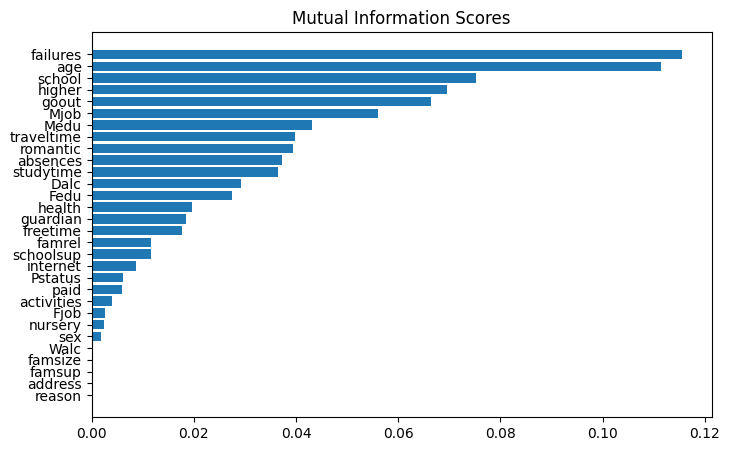

In [76]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [77]:
d3.drop(['Fjob','famsize','romantic','famrel','Pstatus','nursery','guardian','famsup'],axis =1,inplace = True)

#Dummy variable encoding

In [78]:
x= pd.get_dummies(d3, drop_first=True)
print(x)

     age  Medu  Fedu  traveltime  studytime  failures  freetime  goout  Dalc  \
0     18     4     4           2          2         0         3      4     1   
1     17     1     1           1          2         0         3      3     1   
2     15     1     1           1          2         0         3      2     2   
3     15     4     2           1          3         0         2      2     1   
4     16     3     3           1          2         0         3      2     1   
..   ...   ...   ...         ...        ...       ...       ...    ...   ...   
644   19     2     3           1          3         1         4      2     1   
645   18     3     1           1          2         0         3      4     1   
646   18     1     1           2          2         0         1      1     1   
647   17     3     1           2          1         0         4      5     3   
648   18     3     2           3          1         0         4      1     3   

     Walc  ...  Mjob_services  Mjob_tea

In [79]:
X=x.drop(['G3'],axis=1)

print(X)
y = x[['G3']]
print(y)

     age  Medu  Fedu  traveltime  studytime  failures  freetime  goout  Dalc  \
0     18     4     4           2          2         0         3      4     1   
1     17     1     1           1          2         0         3      3     1   
2     15     1     1           1          2         0         3      2     2   
3     15     4     2           1          3         0         2      2     1   
4     16     3     3           1          2         0         3      2     1   
..   ...   ...   ...         ...        ...       ...       ...    ...   ...   
644   19     2     3           1          3         1         4      2     1   
645   18     3     1           1          2         0         3      4     1   
646   18     1     1           2          2         0         1      1     1   
647   17     3     1           2          1         0         4      5     3   
648   18     3     2           3          1         0         4      1     3   

     Walc  ...  Mjob_services  Mjob_tea

#Linear Regression

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

In [81]:
lm2=LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

In [82]:
print(lm2.intercept_)
print(lm2.coef_)
y_pred = lm2.predict(X_test)

[7.66957782]
[[ 0.15173661  0.02556928  0.29613089  0.33665981  0.46545745 -1.43462238
  -0.10427472 -0.09072083  0.01079611 -0.16440673 -0.17004255 -0.04495677
  -1.3555539  -0.44900778  0.15414913  0.85268564  0.14988263  0.27740912
   0.30533185  0.23982279 -0.30070758  0.06939676 -1.07113196 -0.56910187
   0.15746068  1.92269322  0.35755688]]


In [83]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))

Mean squared error: 9.50
Coefficient of determination: 0.19


In [84]:
print(mean_absolute_error(y_test,y_pred))

2.2381294905797597


#Decision Tree Regressor

In [85]:
grade_model = DecisionTreeRegressor(random_state=1,criterion='poisson', max_depth=5)

# Fit model
grade_model.fit(X_train, y_train)
pred = grade_model.predict(X_test)


In [86]:
print(mean_absolute_error(y_test, pred))

2.3070517526423258


#Random Forest Regressor

In [87]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train.values.ravel())
grade_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, grade_preds))

2.2044615384615383


#SVM

In [88]:
from sklearn.svm import SVC
#Build the model
svm = SVC(kernel="rbf", gamma=0.001, C=100)
# Trained the model
svm.fit(X_train, y_train.values.ravel())


SVC(C=100, gamma=0.001)

In [89]:
y_pred= svm.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

2.169230769230769


In [90]:

# # print best parameter after tuning
# print(grid.best_params_)

# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

#Ridge Regression

In [91]:
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score


In [92]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)


Ridge()

In [93]:
x_pred_ridge_test = ridge.predict(X_test)
mean_absolute_error(y_test, x_pred_ridge_test)


2.235619313910353

#ADA BOOSTING

In [94]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np

import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [95]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,10):
     tree_regressor=tree.DecisionTreeRegressor(max_depth=depth,random_state=1)
     if tree_regressor.fit(X,y).tree_.max_depth<depth:
         break
     score=np.mean(cross_val_score(tree_regressor,X,y,scoring='neg_mean_squared_error', cv=crossvalidation,n_jobs=1))
     print(depth, score)

1 -8.494437746811975
2 -8.394514379478585
3 -8.489935801463737
4 -8.94832691235287
5 -10.264292901939244
6 -10.306588883466308
7 -11.457723396002615
8 -10.689267615935801
9 -12.300513433909462


In [96]:
ada=AdaBoostRegressor()
# search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
# search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)

In [97]:
# search.fit(X_train,y_train.values.ravel())
# search.best_params_

In [98]:
ada2=AdaBoostRegressor(n_estimators=500,learning_rate=0.001,random_state=1)


In [99]:
ada2.fit(X_train, y_train.values.ravel())
predictt = ada2.predict(X_test)
mean_absolute_error(y_test,predictt)

2.285204226123909

#XGBOOST

In [100]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [101]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train.values.ravel())

# Predict the model
pred = xgb_r.predict(X_test)

mean_absolute_error(y_test,pred)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:09:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


2.270896812585684